<a href="https://colab.research.google.com/github/RubenMcCarty/Machine-Learning-con-Python-001/blob/master/Lab2_Computer_Vision_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mas alla de Hola Mundo un ejemplo de Vision Artificial
# [MSc. Ruben Quispe](https://www.linkedin.com/in/ruben-quispe-l/)
En el ejercicio anterior, vio cómo crear una red neuronal que descubrió el problema que estaba tratando de resolver. Esto dio un ejemplo explícito de comportamiento aprendido. Por supuesto, en ese caso, fue un poco exagerado porque hubiera sido más fácil escribir la función Y = 2x + 1 directamente, en lugar de molestarse en usar Machine Learning para aprender la relación entre X e Y para un conjunto fijo de valores, y extendiendo eso para todos los valores.

Pero, ¿qué pasa con un escenario en el que escribir reglas como esa es mucho más difícil, por ejemplo, un problema de visión por computadora? Echemos un vistazo a un escenario en el que podemos reconocer diferentes prendas de vestir, entrenadas a partir de un conjunto de datos que contiene 10 tipos diferentes.


# Iniciando con codigo
Comencemos con nuestra importación de TensorFlow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


Entrenaremos una red neuronal para reconocer prendas de ropa de un conjunto de datos común llamado Fashion MNIST. Puede obtener más información sobre este conjunto de datos [aqui](https://github.com/zalandoresearch/fashion-mnist).

Contiene 70.000 prendas de vestir en 10 categorías diferentes. Cada prenda de vestir tiene una imagen en escala de grises de 28x28. Puedes ver algunos ejemplos aquí:![](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

Los datos de Fashion MNIST están disponibles directamente en la API de conjuntos de datos de tf.keras. Lo cargas así:

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a load_data en este objeto le dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas y sus etiquetas.


In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

¿Cómo se ven estos valores? Imprimamos una imagen de entrenamiento y una etiqueta de entrenamiento para ver ... Experimente con diferentes índices en la matriz. Por ejemplo, también eche un vistazo al índice 42 ... es un arranque diferente al del índice 0 Código Texto


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

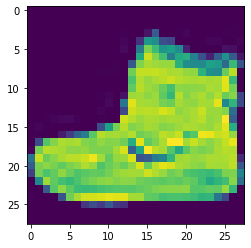

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

Notarás que todos los valores en el número están entre 0 y 255. Si estamos entrenando una red neuronal, por varias razones es más fácil si tratamos todos los valores entre 0 y 1, un proceso llamado **"normalización"**. .y afortunadamente en Python es fácil normalizar una lista como esta sin hacer bucles. Lo haces así:

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Puede que ahora te preguntes por qué hay 2 conjuntos ... entrenamiento y prueba. ¿Recuerdas que hablamos de esto en la introducción? La idea es tener 1 conjunto de datos para el entrenamiento, y luego otro conjunto de datos ... que el modelo aún no ha visto ... para ver qué tan bueno sería clasificando valores. Después de todo, cuando haya terminado, querrá probarlo con datos que no había visto anteriormente.

Diseñemos ahora el modelo. Hay bastantes conceptos nuevos aquí, pero no se preocupe, los dominará. 

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: que define una SECUENCIA de capas en la red neuronal.

**Flaten**: ¿Recuerda antes donde nuestras imágenes eran un cuadrado, cuando las imprimió? Flatten solo toma ese cuadrado y lo convierte en un conjunto de 1 dimensión.

**Dense**: agrega una capa de neuronas

Cada capa de neuronas necesita una función de activación que les diga qué hacer. Hay muchas opciones, pero úsalas por ahora.

**Relu** significa efectivamente "Si X> 0 devuelve X, de lo contrario devuelve 0", por lo que lo que hace solo pasa valores 0 o mayores a la siguiente capa de la red.

**Softmax** toma un conjunto de valores y efectivamente elige el más grande, así que, por ejemplo, si la salida de la última capa se ve como [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], guarda el mayor valor, y lo convierte en [0,0,0,0,1,0,0,0,0] - ¡El objetivo es ahorrar mucha codificación!


Lo siguiente que debe hacer, ahora que el modelo está definido, es construirlo. Para hacer esto, compilalo con un optimizador y una función de pérdida como antes, y luego lo entrena llamando a **model.fit** pidiéndole que ajuste sus datos de entrenamiento a sus etiquetas de entrenamiento, es decir, que averigüe la relación entre los datos de entrenamiento y sus etiquetas reales, por lo que en el futuro, si tiene datos que se parecen a los datos de entrenamiento, puede hacer una predicción de cómo se verían esos datos. 

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4951 - accuracy: 0.8275
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3766 - accuracy: 0.8633
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3361 - accuracy: 0.8774
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3106 - accuracy: 0.8863
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2938 - accuracy: 0.8918


Una vez que haya terminado el entrenamiento, debería ver un valor de precisión al final de la época final. Puede parecer algo así como 0.9098. Esto le indica que su red neuronal tiene una precisión del 91% en la clasificación de los datos de entrenamiento. Es decir, descubrió una coincidencia de patrón entre la imagen y las etiquetas que funcionó el 91% del tiempo. No es genial, pero no está mal considerando que solo se entrenó durante 5 épocas y se hizo con bastante rapidez.

Pero, ¿cómo funcionaría con datos invisibles? Por eso tenemos las imágenes de prueba. Podemos llamar model.evaluate y pasar los dos conjuntos, e informará la pérdida de cada uno. Hagamos un intento:

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 767us/step - loss: 0.3589 - accuracy: 0.8709


[0.35888195037841797, 0.8708999752998352]

Para mí, eso arrojó una precisión de aproximadamente .8838, lo que significa que fue aproximadamente un 88% de precisión. Como se esperaba, probablemente no funcionaría tan bien con datos no vistos como lo hizo con los datos sobre los que se entrenó. A medida que avance en este curso, verá formas de mejorarlo.

Para explorar más, pruebe los siguientes ejercicios:


# Exploration Exercises

###Exercise 1:
Para este primer ejercicio, ejecute el siguiente código: Crea un conjunto de clasificaciones para cada una de las imágenes de prueba y luego imprime la primera entrada en las clasificaciones. La salida, después de ejecutarla, es una lista de números. ¿Por qué crees que es así y qué representan esos números?

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])

[6.3911643e-06 2.9213465e-09 8.0547238e-08 1.3187019e-09 2.3825811e-07
 6.7467819e-04 3.8537351e-06 3.6739842e-03 3.7741256e-06 9.9563700e-01]


Sugerencia: intente ejecutar print (test_labels [0]) y obtendrá un 9. ¿Eso le ayuda a comprender por qué esta lista se ve como es?

In [ ]:
print(test_labels[0])

9


## ¿Qué representa esta lista?
1. Son 10 valores aleatorios sin sentido
2. Son las primeras 10 clasificaciones que hizo la computadora
3. Es la probabilidad de que este elemento sea de cada una de las 10 clases



In [1]:
# tu respuesta

## ¿Cómo sabe que esta lista le dice que el artículo es un botín?
No hay suficiente información para responder esa pregunta.
El décimo elemento de la lista es el más grande y el botín tiene la etiqueta 9
El botín es la etiqueta 9, y hay 0-> 9 elementos en la lista



In [2]:
# tu respuesta

## Ejercicio 2:
Veamos ahora las capas de su modelo. Experimente con diferentes valores para la capa densa con 512 neuronas. ¿Qué resultados diferentes obtienes por pérdida, tiempo de entrenamiento, etc.? ¿Por qué crees que ese es el caso?



In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4704
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3558
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3215
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2970
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3657
[1.1020209e-06 3.3967397e-06 7.9573745e-08 6.1347231e-07 6.1584871e-07
 3.3947080e-03 5.7485340e-06 4.7485195e-02 3.4961217e-06 9.4910502e-01]
9


## Pregunta 1. Aumento a 1024 neuronas: ¿Cuál es el impacto?

1. El entrenamiento lleva más tiempo, pero es más preciso
2. El entrenamiento lleva más tiempo, pero no afecta la precisión
3. El entrenamiento lleva el mismo tiempo, pero es más preciso


In [ ]:
# tu respuesta

## Ejercicio 3:
¿Qué pasaría si eliminas la capa Flatten ()? ¿Por qué crees que ese es el caso?

Obtiene un error sobre la forma de los datos. Puede parecer vago en este momento, pero refuerza la regla general de que la primera capa de su red debe tener la misma forma que sus datos. En este momento, nuestros datos son imágenes de 28x28, y 28 capas de 28 neuronas serían inviables, por lo que tiene más sentido 'aplanar' esas 28,28 en un 784x1. En lugar de escribir todo el código para manejar eso nosotros mismos, agregamos la capa Flatten () al principio, y cuando las matrices se carguen en el modelo más adelante, automáticamente se aplanarán para nosotros.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# This version has the 'flatten' removed. Replace the above with this one to see the error.
#model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5
1875/1875 [==============================] - 2s 914us/step - loss: 0.5215
Epoch 2/5
1875/1875 [==============================] - 2s 919us/step - loss: 0.3949
Epoch 3/5
1875/1875 [==============================] - 2s 940us/step - loss: 0.3565
Epoch 4/5
1875/1875 [==============================] - 2s 963us/step - loss: 0.3315
Epoch 5/5
313/313 [==============================] - 0s 596us/step - loss: 0.3727
[4.1984758e-06 1.4991300e-06 9.1764823e-06 1.2301016e-06 3.7157506e-06
 2.4295799e-02 6.0184135e-07 1.4241877e-01 2.9106534e-04 8.3297402e-01]
9


In [ ]:
# tu respuesta

## Ejercicio 4:

Considere las capas finales (de salida). ¿Por qué hay 10 de ellos? ¿Qué pasaría si tuvieras una cantidad diferente a 10? Por ejemplo, intente entrenar la red con 5

Obtiene un error tan pronto como encuentra un valor inesperado. Otra regla general: la cantidad de neuronas en la última capa debe coincidir con la cantidad de clases para las que está clasificando. En este caso, son los dígitos 0-9, por lo que hay 10 de ellos, por lo que debe tener 10 neuronas en su capa final.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5
1875/1875 [==============================] - 2s 913us/step - loss: 0.5172
Epoch 2/5
1875/1875 [==============================] - 2s 929us/step - loss: 0.3871
Epoch 3/5
1875/1875 [==============================] - 2s 954us/step - loss: 0.3514
Epoch 4/5
1875/1875 [==============================] - 2s 947us/step - loss: 0.3277
Epoch 5/5
313/313 [==============================] - 0s 604us/step - loss: 0.3703
[8.7951539e-06 7.4054172e-09 4.9953542e-07 3.4646087e-07 2.7516328e-06
 5.2314112e-03 4.7630133e-04 8.4322654e-02 8.9068344e-04 9.0906656e-01]
9


In [3]:
# tu respuesta

## Ejercicio 5:

Considere los efectos de capas adicionales en la red. ¿Qué pasará si agregas otra capa entre la que tiene 512 y la capa final con 10?

Respuesta: No hay un impacto significativo, porque se trata de datos relativamente simples. Para datos mucho más complejos (incluidas las imágenes en color que se clasificarán como flores que verá en la próxima lección), a menudo se necesitan capas adicionales. 

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4701
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3569
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3208
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2970
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3409
[4.2650647e-09 6.8696876e-10 1.8469634e-10 1.0410285e-10 2.9688627e-10
 6.5189879e-03 2.8425349e-08 2.5226251e-04 5.8753975e-09 9.9322867e-01]
9


In [4]:
# tu respuesta

# Ejercicio 6:

Considere el impacto del entrenamiento durante más o menos épocas. ¿Por qué crees que sería así?

Pruebe 15 épocas: probablemente obtendrá un modelo con una pérdida mucho mejor que el que tiene 5
Pruebe 30 épocas; es posible que vea que el valor de pérdida deja de disminuir y, a veces, aumenta. Este es un efecto secundario de algo llamado "sobreajuste o overfiting" del que puede aprender,  y es algo que debe tener en cuenta al entrenar redes neuronales. No tiene sentido perder el tiempo entrenando si no está mejorando su pérdida, ¿verdad? :)

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.3.0
Epoch 1/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4977
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3741
Epoch 3/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3354
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3120
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2933
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2798
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2682
Epoch 8/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2569
Epoch 9/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2483
Epoch 10/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2391
Epoch 11/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2304
Epoch 12/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.

In [ ]:
# tu respuesta

# Ejercicio 7:

Antes de entrenar, normalizó los datos, pasando de valores que eran 0-255 a valores que eran 0-1. ¿Cuál sería el impacto de eliminar eso? Aquí está el código completo para probarlo. ¿Por qué crees que obtienes resultados diferentes?

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# To experiment with removing normalization, comment out the following 2 lines
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4734
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3571
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3236
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2981
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3551
[3.3182727e-07 8.6889216e-09 2.5436560e-08 2.0623450e-08 8.7028877e-07
 1.1885997e-03 1.4775013e-06 1.2173067e-01 1.3050828e-07 8.7707788e-01]
9


In [5]:
# tu respuesta

# Ejercicio 8:

Antes, cuando entrenó para épocas adicionales, tuvo un problema en el que su pérdida podría cambiar. Es posible que te haya llevado un poco de tiempo esperar a que el entrenamiento lo haga, y quizás hayas pensado '¿no sería bueno si pudiera detener el entrenamiento cuando alcance el valor deseado?' - es decir, el 95% de precisión podría ser suficiente para ti, y si lo alcanzas después de 3 épocas, ¿por qué quedarte esperando a que termine muchas más épocas? Como cualquier otro programa ... ¡tienes devoluciones de llamada! Veámoslos en acción ...

In [ ]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])




2.3.0
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4716 - accuracy: 0.8334
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3590 - accuracy: 0.8689
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3235 - accuracy: 0.8797
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2984 - accuracy: 0.8899
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2813 - accuracy: 0.8956


In [6]:
# tu respuesta